In [62]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
plt.style.use('seaborn')
np.set_printoptions(precision = 2)

|Size(sqrt)|Number of Bedrooms|Number of floors|Age of Home|Price(1000s dollars|
| --- | --- | --- | --- | --- |
| 2104 | 5 | 1 | 45 | 460 |
| 1416 | 3 | 2 | 40 | 232 |
| 852 | 2 | 1 | 35 | 178 |

In [63]:
x_train = np.array([[2104, 5, 1, 45],[1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

In [64]:
# data is stored in numpy array/matrix
print(f'X Shape: {x_train.shape}, X Type: {type(x_train)}')
print(x_train)
print(f'Y Shape: {y_train.shape}, Y Type: {type(y_train)}')
print(y_train)

X Shape: (3, 4), X Type: <class 'numpy.ndarray'>
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
Y Shape: (3,), Y Type: <class 'numpy.ndarray'>
[460 232 178]


# How to write a matrix and a vector in markdown
- Matrix

    $$ \begin{bmatrix}1 & x_{1}\\
1 & x_{2}\\
1 & x_{3}
\end{bmatrix}$$

# Parameter vector w, b
- w is a vector of n elements.
    - Each element contains the parameter associated with one feature.
    - in our dataset, n is 4.
    - notionally, we draw this as a column vector
        
        $$ \mathbf{\text{w}} =  \begin{bmatrix}    w_{0}\\
            w_{1}\\
      ...\\
      w_{n-1}
    \end{bmatrix}$$
- b is a scalar parameter.


In [98]:
import random
#b_init = random.random()
b_init = 785.1811367994083 # This is the trained bias for optimal solution
#w_init = np.array(random.sample(range(-100, 100),4))
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618]) # this is the trained weight for prediction
print(f'w_init shape: {w_init.shape}, w_init: {w_init}, b_init type:{type(b_init)},b_init: { b_init}')

w_init shape: (4,), w_init: [  0.39  18.75 -53.36 -26.42], b_init type:<class 'float'>,b_init: 785.1811367994083


In [99]:
def predict_single_loop(x,w,b):
    """single predict using linear regression
    
    Args: 
        x (ndarray) : Shape (n, ) example with multiple features.
        w (ndarray) : Shape (n, ) model weights
        b (scalar) : bias parameter
        
    return: 
        p (scalar) : prediction.
    """
    n = x.shape[0]   # This will give the shape of the x along axis = 0.
    p = 0
    for i in range(n):
        p_i = x[i]*w[i]
        p += p_i
    p += b
    return p

In [100]:
# Get the first row of the training data
x_vec = x_train[0,:]
print(f'x_vec shape: {x_vec.shape},x_vec value : {x_vec}')

# Make a prediction using x_vec and w_init
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f'f_wb shape: {f_wb.shape}, prediction is : {f_wb}')

x_vec shape: (4,),x_vec value : [2104    5    1   45]
f_wb shape: (), prediction is : 459.9999976194083


In [101]:
# Now predict for the whole dataset
def predict(x, w, b):
    """single predict using linear regression
        Args:
            x (ndarray): Shape (n, ) examples with multiple features
            w (ndarray): Shape (n, ) model weights parameters
            b (scalar) : model bias
            
        Return:
         p(scalar): prediction
         """
    p = np.dot(x,w) + b
    return p

In [102]:
x_vec = x_train[0,:]
print(f'x_vec shape: {x_vec.shape},x_vec value : {x_vec}')

# Make a prediction using x_vec and w_init
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f'f_wb shape: {f_wb.shape}, prediction is : {f_wb}')

x_vec shape: (4,),x_vec value : [2104    5    1   45]
f_wb shape: (), prediction is : 459.9999976194083


# Compute the cost with Multiple variables
The equation for the cost function with multiple variables **J(w,**b**)** is:
$$\mathbf{J(w, } b) = \frac{1}{2m}\sum_{i=0}^{m-1}(f_{w,b}(\textbf{x}^{(i)})-y^{(i)})^2$$
where: 
$$f_{\textbf{w},b}(\textbf{x}^{(i)}) = \textbf{w.x}^{(i)}+b$$

In [103]:
def compute_cost(X, y, w, b):
    """Compute cost:
        Args:
            X (ndarray): Shape (n, ) Data, examples with multiple features
            y (ndarray): target values
            w (ndarray): Shape (n, ) model weights parameters
            b (scalar) : model bias
            
        Return:
         cost(scalar) : cost
         """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost  = cost / (2*m)
    return cost

In [104]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(f'cost with the initial values of w : {cost}')

cost with the initial values of w : 1.5578904045996674e-12


# Gradient descent with multiple variables
Gradient descent for multiple variables:
$$ \text{repeat until convergence:} \{ \\
w_j = w_j - \alpha \frac{\partial (\textbf{J(w,}b)}{\partial w_j} \dots \text{for n = 0,}\dots \text{n-1} \\
b = b - \alpha \frac{\partial (\textbf{J(w,}b)}{\partial b}\\
\}$$

where, n is the number of features, parameters $w_j$, $b$ are updated simultaneously and where

\begin{equation*}\frac{\partial\mathbf{J(w, } b)}{\partial w_j} = \frac{1}{m}\sum_{i=0}^{m-1}(f_{w,b}(\textbf{x}^{(i)})-y^{(i)})x_j^{(i)}
\end{equation*}
$$\frac{\partial\mathbf{J(w, } b)}{\partial b} = \frac{1}{m}\sum_{i=0}^{m-1}(f_{w,b}(\textbf{x}^{(i)})-y^{(i)})$$

- m is the number of training examples in the data set.
- $f_{w,b}(\textbf{x}^{(i)})$ is the prediction of the model, while $y^{(i)}$ is the target value.

# Compute Gradient with multiple variables


In [105]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        err = np.dot(X[i],w) + b - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db
    

In [106]:
# Compute and display the gradient 
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, w_init, b_init)
print(f'dj_dw at the initial w, b: {tmp_dj_dw}')
print(f'dj_db at the initial w, b: {tmp_dj_db}')

dj_dw at the initial w, b: [-2.73e-03 -6.27e-06 -2.22e-06 -6.92e-05]
dj_db at the initial w, b: -1.6739251122999121e-06


$\textbf{Expected results:}$ 

dj\_dw at the initial w, b is $[ -2.73e^{-03}, -6.27e^{-06}, -2.22e^{06}, -6.92e^{-05}]$ 

dj\_db at the initial w, b is $ -1.673925169143331e^{-06}$

# Gradient descent with multiple variables

In [107]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """Args:
            X :                Data set, m examples with n features
            y :                target values
            w_in:              initial model weights 
            b_in:              initial bias
            cost_function:     function to compute the cost
            gradient_function: function to compute gradient
            alpha:             learning rate
            num_iters:         number of iterations to run gradient descent
        
        
       Returns: 
            w :                updated values of parameter
            b :                updated values of bias parameter
    """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)   # avoid modifying global w within the function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(X,y,w,b)
        
        # update the parameters using w, b, alpha and gradient
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        
        # save the record of the cost J at each iteration
        if i < 100000:
            J_history.append(cost_function(X, y, w, b))
        
        # print the cost at the number of iteration multiple of 10's
        if i% math.ceil(num_iters / 10) == 0:
            print(f' Iteration {i: 4d}, : cost {J_history[-1]:8.2f}')
    
    return w, b, J_history    # return the final w, b, and J history for graphing. 

# Implementation

In [111]:
# initialize the parameters
initial_w = np.zeros_like(w_init)
initial_b = np.zeros_like(b_init)
# iteration and learning rate
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient,
                                           alpha, iterations)
# print the final w and b

print(f'w and b found by the gradient_descent: {b_final:0.2f}, {w_final}')
m,_ = x_train.shape

for i in range(m):
    print(f' Prediction : {np.dot(x_train[i], w_final) + b_final: 0.6f}, target values : {y_train[i]}')


 Iteration    0, : cost  2529.46
 Iteration  100, : cost   695.99
 Iteration  200, : cost   694.92
 Iteration  300, : cost   693.86
 Iteration  400, : cost   692.81
 Iteration  500, : cost   691.77
 Iteration  600, : cost   690.73
 Iteration  700, : cost   689.71
 Iteration  800, : cost   688.70
 Iteration  900, : cost   687.69
w and b found by the gradient_descent: -0.00, [ 0.2   0.   -0.01 -0.07]
 Prediction :  426.185305, target values : 460
 Prediction :  286.167472, target values : 232
 Prediction :  171.467631, target values : 178


Text(0, 0.5, 'Cost')

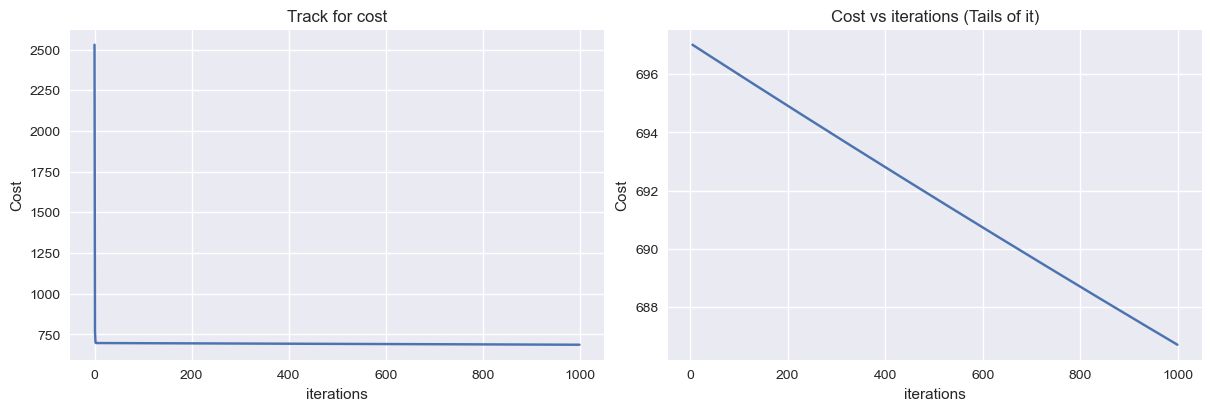

In [128]:
# plot of cost versus iterations
fig, axs = plt.subplots(1, 2, constrained_layout = True, figsize = (12, 4))
axs[0].plot(J_hist)
axs[1].plot(5 + np.arange(len(J_hist[5:])), J_hist[5:])
axs[0].set_title('Track for cost'); axs[1].set_title('Cost vs iterations (Tails of it)')
axs[0].set_xlabel('iterations'); axs[1].set_xlabel('iterations')
axs[0].set_ylabel('Cost'); axs[1].set_ylabel('Cost')